# MUSIC RECOMMENDATIONS


# Ideas Page (Brainstorming)
***
## Data
- [Vetting playlist](https://drive.google.com/file/d/1h_U-_NNFbMLVivUle-4ghbCpE_0pPBIJ/view)
- [Million Playlist Data](https://drive.google.com/drive/folders/1pfpf2HkcksQveB-gg3XVQ5yPxDSY98u0)
- The [Spotify Api](https://developer.spotify.com/documentation/web-api)'s
- [Music Info Dataset](https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks)

## [Analysis](https://drive.google.com/drive/folders/1IiB3BZoV2k9laW_eGmjv9jCp-LBhMHTZ)
- We could cluster the music playlist data using the song data within it, and and try to categorize Mrs. Spindt into one of these playlists
- We could also use the (unfortunatly deprecated) music info API

## Variables
We need to choose 4+ variables. The ? show which ones we need to decide on
- Duration(ms)
- Track Popularity(May convert to overall album popularity)
- Release Date?
- <s>Explict</s>
- Artist?
- <s>Available Markets</s>
- Local?


In [2]:
import bs4 as bs
#import random
import pandas as pd
import seaborn as sb
import numpy as np
#import datetime
import requests as rq
import pickle
import math
import json
#import time
#from collections import Counter
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


def save_pickle(file, value):
    pickle.dump(value, open(file, "wb"))
def load_pickle(file):
    return pickle.load(open(file, "rb"))

In [ ]:
## LOAD DATA
# Load essential data
playlist = json.load(open("data/vetting_playlist.json"))['tracks']['items']
musicInfo = pd.read_csv("data/tracks.csv")

oneMSongs = json.load(open("data/million_playlists/songs_0-999.json"))
print(oneMSongs)


songs = []
for x in playlist:
    songs.append(x['track'])
songs = pd.DataFrame(songs)


def getSongInfo(idList):
    songsNew = []
    errors = 0
    for x in idList:
        try:
            songsNew.append(musicInfo.iloc[list(musicInfo.loc[musicInfo['id'] == idList[x]].to_dict()['id'].keys())[0]])
            # This massave hunk of code basically gets the row of the track ID and strips the dictionary to just get the raw value
        except:
            errors += 1
            
    errorRatio = int((errors / len(idList)) * 100) # This shows how much of the origional array was not found (the higher the worse)
    return pd.DataFrame(songsNew), errorRatio


playlist, errorRatio = getSongInfo(songs['id'].to_dict())
save_pickle("data/playlist.p", playlist)
save_pickle("data/onemsongs.p", oneMSongs)

In [6]:
playlist = load_pickle("data/playlist.p")
oneMSongs = load_pickle("data/onemsongs.p")

musicInfo = pd.read_csv("data/tracks.csv").info()

#train_df, _ = train_test_split(oneMSongs)
#train_df = musicInfo[['danceability', 'loudness', 'duration_ms']]
#train_df.head()
#train_df.reset_index(drop=True, inplace=True)

#dbscan = DBSCAN(eps = 0.05, min_samples = 2)
#clusters = dbscan.fit_predict(train_df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

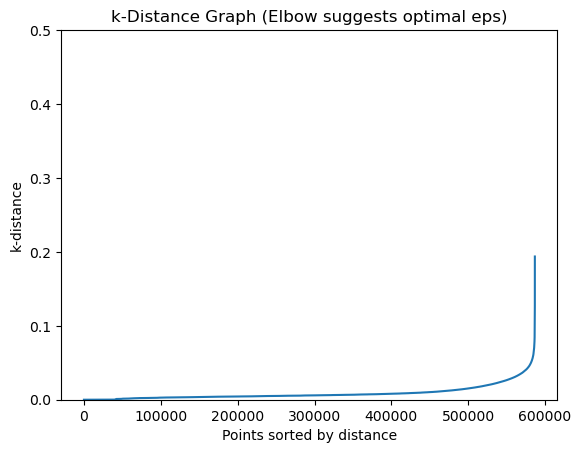

In [8]:
df2 = pd.read_csv('data/tracks.csv')
df = df2.drop(columns=['id', 'name', 'artists', 'id_artists', 'release_date'])
df=df[['danceability','energy']]
#df = df.truncate(after=50000)
from sklearn.neighbors import NearestNeighbors

k = 2
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

distances = np.sort(distances[:, k-1], axis=0)
fig, ax = plt.subplots()
ax.set_ylim(0, 0.5)
plt.plot(distances)
plt.ylabel('k-distance')
plt.xlabel('Points sorted by distance')
plt.title('k-Distance Graph (Elbow suggests optimal eps)')
plt.show()

In [ ]:
"""epsilon = 0.05  # Chosen based on k-distance graph
min_samples = 2  # 2 * num_features (2D data)
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(df)
df['Cluster'] = dbscan.labels_



sb.scatterplot(data=df, x='energy', y='instrumentalness', hue="Cluster", palette="deep")


plt.figure()"""


epsilon = 0.05  # Chosen based on k-distance graph
min_samples = 2  # 2 * num_features (2D data)
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
playlist=playlist[['danceability','energy','instrumentalness','acousticness']]

clusters = dbscan.fit_predict(playlist)
playlist['Cluster'] = dbscan.labels_



sb.scatterplot(data=playlist, x='energy', y='instrumentalness', hue="Cluster", palette="deep")


# Song Charistics related to each other

:white_check_mark: `danceability` and `loudness`<br>
:white_check_mark: `danceability` and `duration_ms`<br>




# Song Charistiscs not related to each other

:x: `tempo` and `energy`<br>
:x: `danceability` and `energy`<br>
:x: `danceability` and `popularity`<br>


In [ ]:
sb.scatterplot(data=musicInfo, x='danceability', y='popularity')

#plt.figure()
